<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/Trabalhos/Atividade%207%20-%20Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data & Data Analytics
Atividade 7 - Exercícios sobre Agrupamento
(Dupla)


PS: faça download deste arquivo e, em seguida, faça upload no Google Colab / Jupyter Notebook.
https://drive.google.com/file/d/1qOBqqF8QvFoe9MZqfWOUINn91Y0z2p1U/view?usp=sharing

O dataset possui cinco colunas, indicando os clientes de um shopping (idade, renda, sexo) e sua pontuação de "compra". 




---



**1 - Descreva o principal objetivo da tarefa de agrupamento.**

**RESPOSTA**: *O objetivo principal é categorizar alguma informação em grupos semelhantes*



---



**2 - Monte um fluxograma que represente o funcionamento do K-Means.**

**RESPOSTA:**

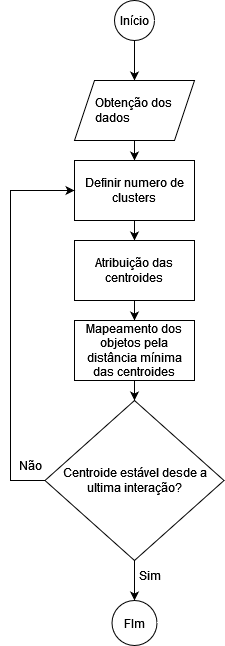



---



**3 - Explique o método do cotovelo. Como podemos, com a ajuda deste método, encontrar o melhor valor de K no K-Means?**

**RESPOSTA:** *Basicamente o método do cotovelo é um gráfico onde o ponto de inflexão que inicia a estabilidade dos dados representa o melhor valor de K, visto que ele representa o melhor balanceamento entre o número de grupos e precisão ma classificação*



---



**4 - No Google Colab, utilizando o dataset mencionado acima, encontre o número ideal de agrupamentos. Comprove como você encontrou tal valor utilizando o gráfico mais adequado.**


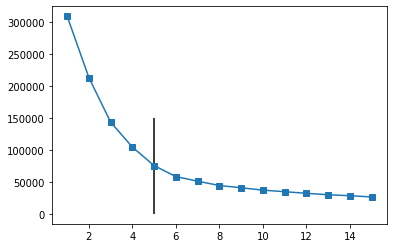

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Importar KMeans
from sklearn.cluster import KMeans

# Importar dados
df = pd.read_csv('https://raw.githubusercontent.com/EutruTepit/BigData2022/main/datasets%20bdda/Mall_Customers.csv')

# Renomear colunas
remap={
  'CustomerID': 'id',
  'Genre' : 'gen',
  'Age': 'age',
  'Annual Income (k$)' : 'renda',
  'Spending Score (1-100)' : 'score' 
}
df.rename(remap, axis=1, inplace=True)


# Tratamento coluna Genero - Conversão para número
df["gen"] = df["gen"].map({
    'Male': 0,
    'Female': 1
})

# Remover coluna desnecesária
df = df.drop(columns=['id'])


inertias = []
def criar_modelo_kmeans():
  for i in range(1, 16):
    km = KMeans(n_clusters=i)
    km.fit(df)
    inertias.append(km.inertia_)
  return inertias

criar_modelo_kmeans()


plt.plot(range(1,1+len(inertias)),inertias, marker='s');

plt.vlines(x=5, ymax=150000, ymin=0);

**RESPOSTA:** *O melhor valor para K, ou seja, melhor numero de agrupamentos é 5, conforme o gráfico do cotovelo*



---



**5 - Ainda no Google Colab, realize a análise dos agrupamentos, fornecendo rótulos que descrevam cada grupo, levando em consideração a semântica de cada coluna.**

In [2]:
km = KMeans(n_clusters=5, random_state=0) #random_state previnir a troca de labels a cada nova execução
km.fit(df)

df['rotulo'] = km.predict(df)
df.head()

,gen,age,renda,score,rotulo
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0


In [3]:
df['rotulo'] = df['rotulo'].astype(str)

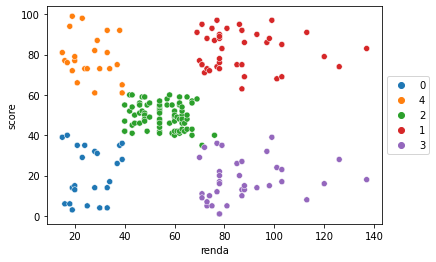

In [4]:
sns.scatterplot(data=df, x='renda', y='score', hue='rotulo').legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [5]:
# remapeamento
mapeamento = {
    '0': 'Necessidade',
    '1': 'Compulsivo',
    '2': 'Balanceado',
    '3': 'Acomulador',
    '4': 'Endividado'
}

df['rotulo'] = df['rotulo'].map(mapeamento)

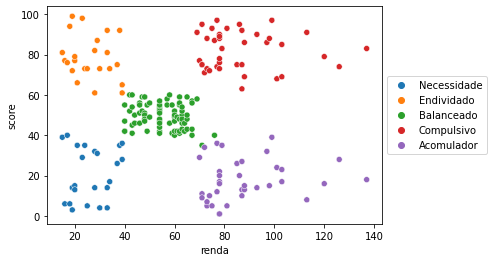

In [6]:
sns.scatterplot(data=df, x='renda', y='score', hue='rotulo').legend(loc='center left', bbox_to_anchor=(1, 0.5));